**Cencus Income - Decision Tree Classifier**

# Data Gathering

In [1]:
from urllib.request import urlopen
from io import BytesIO

In [2]:
def parse_binary_data_uci_repo(URL):
  with urlopen(URL) as fptr:
    return BytesIO(fptr.read())

In [3]:
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = parse_binary_data_uci_repo(DATA_URL)


In [4]:
TEST_DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
test_data = parse_binary_data_uci_repo(TEST_DATA_URL)


In [5]:
HEADER_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"
data_info = parse_binary_data_uci_repo(HEADER_URL)
header_info = data_info.readlines()[-1:-15:-1]


In [6]:
columns = []
for header in header_info[::-1]:
  columns.append(header.decode().split(':')[0])
columns.append("Income")


# Data Ingestion

In [7]:
import pandas as pd
import numpy as np

In [8]:
data.seek(0)
df = pd.read_csv(data, skip_blank_lines=True, header=None, names=columns, sep=' *, *', na_values='?')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [9]:
test_data.seek(0)
test_df = pd.read_csv(test_data, skip_blank_lines=True, header=None, skiprows=1, names=columns, sep=' *, *', na_values='?')

In [10]:
df = df.sample(frac=0.3)

In [11]:
df.shape

(9768, 15)

In [12]:
test_df = test_df.sample(frac=0.3) 

# EDA

## Dropping null values

In [13]:
test_df.shape

(4884, 15)

In [14]:
df.isna().sum()

age                 0
workclass         526
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        530
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    174
Income              0
dtype: int64

In [15]:
test_df.isna().sum()

age                 0
workclass         282
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        285
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     66
Income              0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [18]:
df.shape

(9071, 15)

In [19]:
test_df.dropna(inplace=True)

In [20]:
test_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [21]:
test_df.shape

(4536, 15)

## Dropping duplicate values

In [22]:
df.duplicated().sum()

2

In [23]:
test_df.duplicated().sum()

1

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
test_df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

In [27]:
test_df.duplicated().sum()

0

In [28]:
df.shape

(9069, 15)

In [29]:
test_df.shape

(4535, 15)

## Drop irrelavant columns

In [30]:
df = df.drop(labels=['education', 'fnlwgt'], axis=1)
test_df = test_df.drop(labels=['education', 'fnlwgt'], axis=1)

In [31]:
df.shape

(9069, 13)

In [32]:
test_df.shape

(4535, 13)

## Conversion of Income Label to Classifier

In [33]:
df.groupby(['Income'])[['Income']].count()

,Income
Income,
<=50K,6813
>50K,2256


In [34]:
test_df.groupby(['Income'])[['Income']].count()

,Income
Income,
<=50K.,3407
>50K.,1128


In [35]:
df['Income'] = df['Income'].apply(lambda x: 1 if x == ">50K" else 0)

In [36]:
test_df['Income'] = test_df['Income'].apply(lambda x: 0 if x == "<=50K." else 1)

In [37]:
df.groupby(['Income'])[['Income']].count()

,Income
Income,
0,6813
1,2256


In [38]:
test_df.groupby(['Income'])[['Income']].count()

,Income
Income,
0,3407
1,1128


## Head, Correlation, Describe, Info

In [39]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
21,54,Private,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,0
28571,45,Local-gov,12,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,0
13389,39,Self-emp-not-inc,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,0
25464,24,Private,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
30906,39,Self-emp-not-inc,5,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,0,0,40,Cuba,0


In [40]:
test_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
2137,44,Private,9,Divorced,Sales,Not-in-family,Asian-Pac-Islander,Female,0,0,40,United-States,0
11723,35,Private,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,0
13350,53,Self-emp-not-inc,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,30,United-States,0
4430,33,State-gov,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
4289,72,Private,5,Married-civ-spouse,Sales,Husband,White,Male,0,0,16,United-States,0


In [41]:
df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,Income
age,1.000000,0.046959,0.069586,0.057408,0.090937,0.231057
education-num,0.046959,1.000000,0.108430,0.079338,0.153791,0.326568
capital-gain,0.069586,0.108430,1.000000,-0.032516,0.078365,0.225386
capital-loss,0.057408,0.079338,-0.032516,1.000000,0.039800,0.156310
hours-per-week,0.090937,0.153791,0.078365,0.039800,1.000000,0.224838
Income,0.231057,0.326568,0.225386,0.156310,0.224838,1.000000


In [42]:
test_df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,Income
age,1.000000,0.028230,0.079496,0.046508,0.094740,0.220632
education-num,0.028230,1.000000,0.131281,0.081895,0.123288,0.327272
capital-gain,0.079496,0.131281,1.000000,-0.029995,0.087000,0.209789
capital-loss,0.046508,0.081895,-0.029995,1.000000,0.050791,0.159785
hours-per-week,0.094740,0.123288,0.087000,0.050791,1.000000,0.221962
Income,0.220632,0.327272,0.209789,0.159785,0.221962,1.000000


In [43]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,Income
count,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000
mean,38.531591,10.129011,1032.828868,89.218877,40.926784,0.248760
std,13.197953,2.571369,6932.928096,408.813160,12.042095,0.432318
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,3900.000000,99.000000,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9069 entries, 21 to 12572
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9069 non-null   int64 
 1   workclass       9069 non-null   object
 2   education-num   9069 non-null   int64 
 3   marital-status  9069 non-null   object
 4   occupation      9069 non-null   object
 5   relationship    9069 non-null   object
 6   race            9069 non-null   object
 7   sex             9069 non-null   object
 8   capital-gain    9069 non-null   int64 
 9   capital-loss    9069 non-null   int64 
 10  hours-per-week  9069 non-null   int64 
 11  native-country  9069 non-null   object
 12  Income          9069 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 991.9+ KB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4535 entries, 2137 to 16118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4535 non-null   int64 
 1   workclass       4535 non-null   object
 2   education-num   4535 non-null   int64 
 3   marital-status  4535 non-null   object
 4   occupation      4535 non-null   object
 5   relationship    4535 non-null   object
 6   race            4535 non-null   object
 7   sex             4535 non-null   object
 8   capital-gain    4535 non-null   int64 
 9   capital-loss    4535 non-null   int64 
 10  hours-per-week  4535 non-null   int64 
 11  native-country  4535 non-null   object
 12  Income          4535 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 496.0+ KB


# Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
def Encoder(frame: pd.DataFrame) -> pd.DataFrame:
  columnsToEncode = list(frame.select_dtypes(include=['object']))
  le = LabelEncoder()
  for feature in columnsToEncode:
    try:
      frame[feature] = le.fit_transform(frame[feature])
    except:
      print('Error at encoding feature: ', feature)
  return frame

In [67]:
df = Encoder(df)

In [68]:
test_df = Encoder(test_df)



# Creating train test split


In [71]:
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]

In [72]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [73]:
print("X: ", X_train.shape, y_train.shape)
print("y: ", X_test.shape, y_test.shape)

X:  (9069, 12) (9069,)
y:  (4535, 12) (4535,)


# Decision  Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_c = DecisionTreeClassifier()

In [75]:
dt_c.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.6816929487277223, 0.9871794871794872, 'X[5] <= 0.5\ngini = 0.374\nsamples = 9069\nvalue = [6813, 2256]'),
 Text(0.4182125459028104, 0.9615384615384616, 'X[2] <= 12.5\ngini = 0.496\nsamples = 3728\nvalue = [2040, 1688]'),
 Text(0.26856341536482936, 0.9358974358974359, 'X[8] <= 5095.5\ngini = 0.447\nsamples = 2592\nvalue = [1719, 873]'),
 Text(0.26771948152050673, 0.9102564102564102, 'X[2] <= 9.5\ngini = 0.419\nsamples = 2451\nvalue = [1719, 732]'),
 Text(0.11118321029055349, 0.8846153846153846, 'X[2] <= 7.5\ngini = 0.357\nsamples = 1554\nvalue = [1193, 361]'),
 Text(0.041161554610204966, 0.8589743589743589, 'X[9] <= 1779.5\ngini = 0.17\nsamples = 363\nvalue = [329, 34]'),
 Text(0.02831134318376103, 0.8333333333333334, 'X[10] <= 49.5\ngini = 0.156\nsamples = 353\nvalue = [323, 30]'),
 Text(0.009995341468696257, 0.8076923076923077, 'X[0] <= 39.5\ngini = 0.125\nsamples = 299\nvalue = [279, 20]'),
 Text(0.0033757353772905564, 0.782051282051282, 'X[1] <= 1.5\ngini = 0.035\nsamples = 

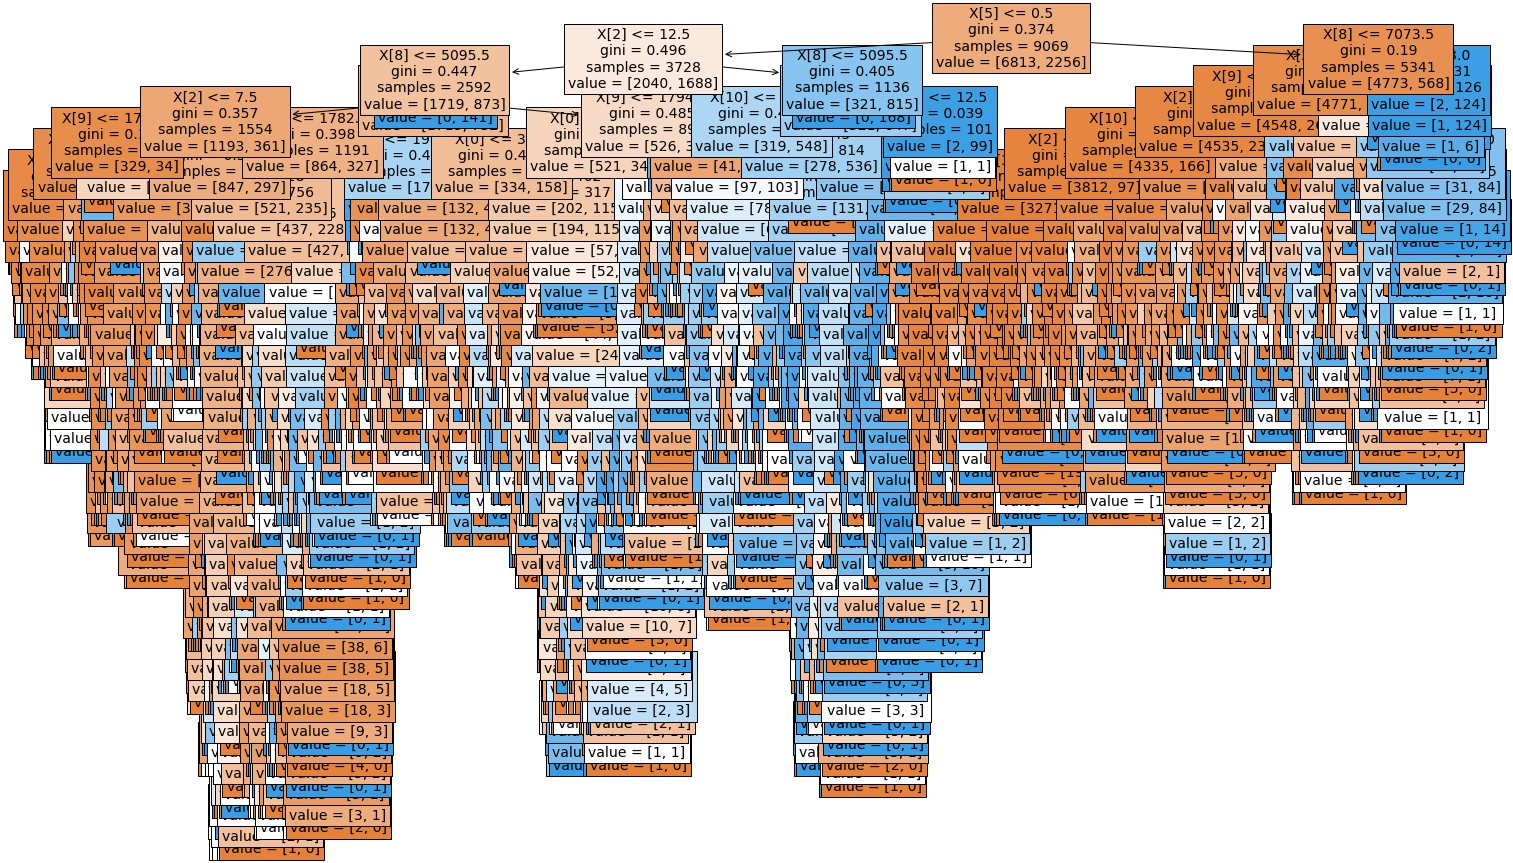

In [77]:
fig=plt.figure(figsize=(25,15))
tree.plot_tree(dt_c,filled=True,fontsize=14)

In [78]:
y_prediction = dt_c.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score, classification_report

In [88]:
accuracy_score(y_test, y_prediction)

0.805071664829107

In [101]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3407
           1       0.61      0.58      0.60      1128

    accuracy                           0.81      4535
   macro avg       0.74      0.73      0.73      4535
weighted avg       0.80      0.81      0.80      4535



# Hyperparameter - GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [89]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [90]:
dt_c_gscv = GridSearchCV(estimator = dt_c,
                         param_grid = params,
                         cv = 4,
                         n_jobs = -1,
                         verbose = 1,
                         scoring = "accuracy")

In [92]:
%%time
dt_c_gscv.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 501 ms, sys: 92.8 ms, total: 594 ms
Wall time: 4.34 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [94]:
score_df = pd.DataFrame(dt_c_gscv.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008390,0.000366,0.002891,0.000324,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.813051,0.815615,0.828849,0.816498,0.818503,0.006106,42
1,0.008948,0.000042,0.002911,0.000143,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.813051,0.815615,0.828849,0.816498,0.818503,0.006106,42
2,0.008641,0.000343,0.002906,0.000149,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.813051,0.815615,0.828849,0.816498,0.818503,0.006106,42
3,0.008759,0.000424,0.003611,0.000814,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.813051,0.815615,0.828849,0.816498,0.818503,0.006106,42
4,0.009234,0.000847,0.002800,0.000243,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.813051,0.816939,0.828408,0.816056,0.818613,0.005835,41


In [95]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
35,0.013486,0.000442,0.002570,0.000120,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.843474,0.844288,0.849140,0.844729,0.845408,0.002201,1
36,0.015153,0.002316,0.002563,0.000217,entropy,5,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.843474,0.843405,0.849140,0.844729,0.845187,0.002342,2
37,0.016498,0.003790,0.003164,0.000755,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.839065,0.843405,0.848258,0.844729,0.843864,0.003290,3
10,0.015535,0.002670,0.002764,0.000219,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834656,0.842082,0.850904,0.843846,0.842872,0.005779,4
11,0.017029,0.004269,0.002742,0.000122,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834656,0.841200,0.850904,0.843846,0.842652,0.005822,5


In [97]:
dt_c_gscv.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [98]:
dt_best = dt_c_gscv.best_estimator_

In [102]:
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [103]:
y_predict_2 = dt_best.predict(X_test)

In [104]:
accuracy_score(y_test, y_predict_2)

0.8374862183020948

In [105]:
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3407
           1       0.78      0.48      0.59      1128

    accuracy                           0.84      4535
   macro avg       0.82      0.72      0.75      4535
weighted avg       0.83      0.84      0.82      4535



**==========THE END==========**